# Web Scraping Documentation
---
## Purpose
To create an interactive GUI that allows the user to write a set of instructions that are executed over the internet. The instructions can be used to web-scrape or to automatically perform a set of instructions repeatedly. The user is able to select which of the two modes they wish to use. 

## Static Webpage Example

In [2]:
import requests
from bs4 import BeautifulSoup

URL = "https://webscraper.io/test-sites/e-commerce/allinone/computers/laptops"
page = requests.get(URL)

soup = BeautifulSoup(page.content, "html.parser")
# print(soup.prettify())

results = soup.find_all(class_="caption")
# print(results)

for result in results:
    resulth4s = result.find_all("h4")
    name = resulth4s[1].find_all("a")[0]['title']
    price = resulth4s[0].text
    description = result.find("p").text
    print(f"{name} | {price} | {description}")
    print()

False


## Pagination Webpage Example

In [57]:
import requests
from bs4 import BeautifulSoup

URL = "https://webscraper.io/test-sites/e-commerce/static/computers/laptops"
URLPageTag = "?page="
pageNum = 1

for pageNum in range(1, 20):
    page = requests.get(URL + URLPageTag + str(pageNum))
    soup = BeautifulSoup(page.content, "html.parser")
    results = soup.find_all(class_="caption")
    for result in results:
        resulth4s = result.find_all("h4")
        name = resulth4s[1].find_all("a")[0]['title']
        price = resulth4s[0].text
        description = result.find("p").text
        print(f"{name} | {price} | {description}")
        print()

Packard 255 G2 | $416.99 | 15.6", AMD E2-3800 1.3GHz, 4GB, 500GB, Windows 8.1

Aspire E1-510 | $306.99 | 15.6", Pentium N3520 2.16GHz, 4GB, 500GB, Linux

ThinkPad T540p | $1178.99 | 15.6", Core i5-4200M, 4GB, 500GB, Win7 Pro 64bit

ProBook | $739.99 | 14", Core i5 2.6GHz, 4GB, 500GB, Win7 Pro 64bit

ThinkPad X240 | $1311.99 | 12.5", Core i5-4300U, 8GB, 240GB SSD, Win7 Pro 64bit

Aspire E1-572G | $581.99 | 15.6", Core i5-4200U, 8GB, 1TB, Radeon R7 M265, Windows 8.1

ThinkPad Yoga | $1033.99 | 12.5" Touch, Core i3-4010U, 4GB, 500GB + 16GB SSD Cache,

Pavilion | $609.99 | 15.6", Core i5-4200U, 6GB, 750GB, Windows 8.1

Inspiron 15 | $745.99 | Moon Silver, 15.6", Core i7-4510U, 8GB, 1TB, Radeon HD R7 M265 2GB,

Dell XPS 13 | $1281.99 | 13.3" Touch, Core i5-4210U, 8GB, 128GB SSD, Windows 8.1

ThinkPad X230 | $1244.99 | 12.5", Core i5 2.6GHz, 8GB, 180GB SSD, Win7 Pro 64bit

HP 250 G3 | $520.99 | 15.6", Core i5-4210U, 4GB, 500GB, Windows 8.1

ThinkPad Yoga | $1223.99 | 12.5" Touch, Core i5 420

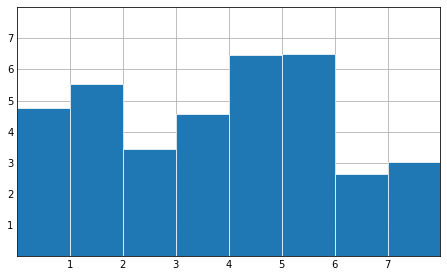

In [4]:
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('_mpl-gallery')

# make data:
np.random.seed(3)
x = 0.5 + np.arange(8)
y = np.random.uniform(2, 7, len(x))

# plot
fig, ax = plt.subplots()

ax.bar(x, y, width=1, edgecolor="white", linewidth=0.7)

ax.set(xlim=(0, 8), xticks=np.arange(1, 8),
       ylim=(0, 8), yticks=np.arange(1, 8))

plt.show()

## Pop-up Webpage Example

## Testing on a real website

Using a wikipedia url, print the work cited section:

In [36]:
import requests
from bs4 import BeautifulSoup

URL = "https://en.wikipedia.org/wiki/Ottawa"
page = requests.get(URL)

soup = BeautifulSoup(page.content, "html.parser")

print("Works Cited")
print("-----------")

refs = soup.find_all(class_="refbegin")

def recursive_print_content(content):
    ans_string = ''
    for item_of_content in content:
        if isinstance(item_of_content, str):
            ans_string += item_of_content
        else:
            ans_string += recursive_print_content(item_of_content)
    return ans_string

for ref in refs:
    ul = ref.find("ul")
    for li in ul:
        cite = li.find("cite")
        if cite != -1:
            print(recursive_print_content(cite))
            print()

Works Cited
-----------
Brault, Lucien (1946). Ottawa Old and New. Ottawa Historical Information Institute. OCLC 2947504.

Hale, James (2011). Frommer's Ottawa. John Wiley and Sons. ISBN 978-0-470-68158-9. Archived from the original on 18 May 2016. Retrieved 15 November 2015.

Keshen, Jeff; St-Onge, Nicole (2001). Ottawa—making a capital. University of Ottawa Press. ISBN 978-0-7766-0521-0. Archived from the original on 24 April 2016. Retrieved 15 November 2015.

Lee, David (2006). Lumber kings & shantymen: logging and lumbering in the Ottawa Valley. James Lorimer & Company. ISBN 978-1-55028-922-0. Archived from the original on 12 May 2016. Retrieved 15 November 2015.

Legget, Robert (1986). Rideau Waterway. University of Toronto Press. ISBN 0-8020-6591-0. Archived from the original on 14 May 2016. Retrieved 15 November 2015.

Martin, Carol (1997). Ottawa: a colourguide. Formac Publishing Company. ISBN 978-0-88780-396-3. Archived from the original on 6 May 2016. Retrieved 15 November 20

Creates a dictionary to count all table of content keywords for the given URL.

In [52]:
import requests
from bs4 import BeautifulSoup

URL = "https://en.wikipedia.org/wiki/Friends"
page = requests.get(URL)

soup = BeautifulSoup(page.content, "html.parser")

def recursive_print_content(content):
    ans_string = ''
    for item_of_content in content:
        if isinstance(item_of_content, str):
            ans_string += item_of_content
        else:
            ans_string += recursive_print_content(item_of_content)
    return ans_string

div = soup.find("div", role="navigation")
toc_texts = div.find_all("span", class_="toctext")
toc_dictionary = {}

for toc_text in toc_texts:
    keyword = recursive_print_content(toc_text)
    if keyword in toc_dictionary:
        toc_dictionary[keyword] = toc_dictionary[keyword] + 1
    else:
        toc_dictionary[keyword] = 1
    print(keyword)

print(toc_dictionary)

Premise
Cast and characters
Episodes
Season 1
Season 2
Season 3
Season 4
Season 5
Season 6
Season 7
Season 8
Season 9
Season 10
Production
Conception
Casting
Writing
Filming
Series finale
Reunion special
Reception
Critical reception
Awards
Ratings
Syndication
Cultural impact
Distribution
Broadcast
United States
International
Remaster
Home media
Streaming
Blu-ray and DVD
Spin-off
See also
References
Further reading
External links
{'Premise': 6, 'Cast and characters': 1, 'Episodes': 1, 'Season 1': 1, 'Season 2': 1, 'Season 3': 1, 'Season 4': 1, 'Season 5': 1, 'Season 6': 1, 'Season 7': 1, 'Season 8': 1, 'Season 9': 1, 'Season 10': 1, 'Production': 1, 'Conception': 1, 'Casting': 1, 'Writing': 1, 'Filming': 1, 'Series finale': 1, 'Reunion special': 1, 'Reception': 1, 'Critical reception': 1, 'Awards': 1, 'Ratings': 1, 'Syndication': 1, 'Cultural impact': 1, 'Distribution': 1, 'Broadcast': 1, 'United States': 1, 'International': 1, 'Remaster': 1, 'Home media': 1, 'Streaming': 1, 'Blu-ray an

Target "Premise" paragraph in "https://en.wikipedia.org/wiki/Friends"

In [91]:
import requests
import re
from bs4 import BeautifulSoup

URL = "https://en.wikipedia.org/wiki/Friends"
page = requests.get(URL)

soup = BeautifulSoup(page.content, "html.parser")
summary_title_words = ["Plot"]


def no_class(class_):
    return not class_

def recursive_print_content(content):
    ans_string = ''
    for item_of_content in content:
        if isinstance(item_of_content, str):
            ans_string += item_of_content
        else:
            ans_string += recursive_print_content(item_of_content)
    return ans_string

word_dictionary = {}
def decode_words(p):
    for word in recursive_print_content(p).split(" "):
            if(len(word) <= 2): continue
            word = re.sub(r"[,.(\[.*?\])(\n)]", "", word.lower())
            if word in word_dictionary:
                word_dictionary[word] = word_dictionary[word] + 1
            else:
                word_dictionary[word] = 1

p_budget = 10

def target_sections(target_id, tag_budget, p_budget):
    target_span = soup.find("span", id=target_id)
    if target_span == None: return p_budget
    target_h2 = target_span.parent
    print("HIT " + target_id + "!", end="")
    target_tag = target_h2.find_next_sibling()
    while tag_budget > 0 and p_budget > 0 and target_tag.name != "h2":
        if target_tag.name != None and target_tag.name == "p":
            decode_words(target_tag)
            p_budget -= 1
        target_tag = target_tag.find_next_sibling()
        tag_budget -= 1
    return p_budget

# Plot -> Premise -> Synopsis -> Overview -> Episodes
target_ids = ["Plot", "Premise", "Synopsis", "Overview", "Episodes", "Main", "Characters"]
for target_id in target_ids:
    if p_budget == 0: break
    p_budget = target_sections(target_id, 20, p_budget)


print(word_dictionary)

HIT Premise!HIT Episodes!{'rachel': 24, 'green': 2, 'sheltered': 1, 'but': 8, 'friendly': 1, 'woman': 4, 'flees': 1, 'her': 33, 'wedding': 4, 'day': 1, 'and': 61, 'wealthy': 1, 'yet': 2, 'unfulfilling': 1, 'life': 1, 'finds': 1, 'childhood': 1, 'friend': 5, 'monica': 12, 'geller': 4, 'tightly': 1, 'wound': 1, 'caring': 1, 'chef': 4, 'becomes': 4, 'waitress': 3, 'west': 1, 'village': 1, 'coffee': 1, 'house': 1, 'central': 6, 'perk': 6, 'after': 15, 'she': 18, 'moves': 4, 'into': 2, "monica's": 6, 'apartment': 4, 'above': 1, 'joins': 1, 'group': 2, 'single': 1, 'friends': 1, 'their': 3, 'mid-20s:': 1, 'previous': 1, 'roommate': 4, 'phoebe': 11, 'buffay': 1, 'eccentric': 2, 'masseuse': 3, 'musician;': 1, 'neighbor': 1, 'joey': 13, 'tribbiani': 2, 'dim-witted': 1, 'loyal': 1, 'struggling': 2, 'actor': 2, 'womanizer;': 1, "joey's": 1, 'chandler': 17, 'bing': 2, 'sarcastic': 1, 'self-deprecating': 1, 'data': 1, 'processor;': 1, 'older': 1, 'brother': 3, "chandler's": 4, 'college': 2, 'ross':

Using a budget of \<p\> tags, create a map of words to # of occurances. Target \<p\> tags close to the "summary" section (if possible).

In [97]:
import requests
import re
from bs4 import BeautifulSoup

URL = "https://en.wikipedia.org/wiki/Friends"
page = requests.get(URL)
p_budget = 10

soup = BeautifulSoup(page.content, "html.parser")

def no_class(class_):
    return not class_

def recursive_print_content(content):
    ans_string = ''
    for item_of_content in content:
        if isinstance(item_of_content, str):
            ans_string += item_of_content
        else:
            ans_string += recursive_print_content(item_of_content)
    return ans_string

p = soup.find_all("p", class_=no_class)
print(p)
word_dictionary = {}

for i in range(p_budget):
    if i < len(p):
        for word in recursive_print_content(p[i]).split(" "):
            if(len(word) <= 2): continue
            word = re.sub(r"[,.(\[.*?\])(\n)]", "", word.lower())
            if word in word_dictionary:
                word_dictionary[word] = word_dictionary[word] + 1
            else:
                word_dictionary[word] = 1

# print(recursive_print_content(p), end="\n\n")
# print(word_dictionary)

[<p><i><b>Friends</b></i> is an American television sitcom created by <a href="/wiki/David_Crane_(producer)" title="David Crane (producer)">David Crane</a> and <a href="/wiki/Marta_Kauffman" title="Marta Kauffman">Marta Kauffman</a>, which aired on <a href="/wiki/NBC" title="NBC">NBC</a> from September 22, 1994, to May 6, 2004, lasting <a href="/wiki/List_of_Friends_episodes" title="List of Friends episodes">ten seasons</a>.<sup class="reference" id="cite_ref-1"><a href="#cite_note-1">[1]</a></sup> With an <a href="/wiki/Ensemble_cast" title="Ensemble cast">ensemble cast</a> starring <a href="/wiki/Jennifer_Aniston" title="Jennifer Aniston">Jennifer Aniston</a>, <a href="/wiki/Courteney_Cox" title="Courteney Cox">Courteney Cox</a>, <a href="/wiki/Lisa_Kudrow" title="Lisa Kudrow">Lisa Kudrow</a>, <a href="/wiki/Matt_LeBlanc" title="Matt LeBlanc">Matt LeBlanc</a>, <a href="/wiki/Matthew_Perry" title="Matthew Perry">Matthew Perry</a> and <a href="/wiki/David_Schwimmer" title="David Schwim

JSON Demo:

In [93]:
import json

# Data to be written
dictionary = {
    "name": "sathiyajith",
    "rollno": 56,
    "cgpa": 8.6,
    "phonenumber": "9976770500"
}
 
# Serializing json
json_object = json.dumps(dictionary, indent=4)
 
# Writing to sample.json
with open("sample.json", "w") as outfile:
    outfile.write(json_object)

# or:
# with open("sample.json", "w") as outfile:
#     json.dump(dictionary, outfile)

## Pandas examples

In [64]:
import pandas as pd

dataset = {
    'cars': ["BMW", "Volvo", "Ford"],
    "passings": [3, 7, 2]
}

df = pd.DataFrame(dataset)

writer = pd.ExcelWriter('out.xlsx')
df.to_excel(writer, sheet_name='Sheet1')

workbook = writer.bookworksheet = writer.sheets['Sheet1']


ModuleNotFoundError: No module named 'openpyxl'